In [7]:
# %%
import pandas as pd
import numpy as np
import helpers.hansard as hansard
import helpers.process as process
from helpers import io as pickle_io
import sys
import datetime
import gc


In [8]:
exp = 'eval_num_topics_3'
df = hansard.getTopicsProbsDf(exp)

loading df from /home/azureuser/cloudfiles/code/data/processing/hansard/experiment/eval_num_topics_3/speeches_df_topics_probs.pkl...
loaded df.
loading counts of tokens...
loading bigrams from /home/azureuser/cloudfiles/code/data/processing/hansard/experiment/eval_num_topics_3/bigrams.pkl
File exists and is readable
loaded bigrams.
loaded counts of tokens.


In [9]:
df.head(20)

,date_time,chamber,parliament,session,period,page,name,name_id,party,in_gov,electorate,first_speech,context,context_title,context_type,speech_type,probs,token_count
0,1998-03-02 12:31:00.000000,Reps,38,1,6,1,"Grace, Elizabeth, MP",ML6,LP,True,Lilley,0,debate,committees,committees,speech,"[9.9e-06, 1.636e-05, 9.42e-06, 1.155e-05, 9.51...",277
1,1998-03-02 12:32:00.000000,Senate,38,1,6,1,"Neal, Sen Belinda",B36,ALP,True,NSW,0,debate,social security legislation amendment (youth a...,bills,speech,"[3.83e-06, 6.33e-06, 3.65e-06, 4.47e-06, 3.68e...",298
2,1998-03-02 12:36:00.000000,Reps,38,1,6,1,"Price, Roger, MP",QI4,ALP,True,Chifley,0,debate,committees,committees,speech,"[9.13e-06, 1.509e-05, 8.68e-06, 1.065e-05, 8.7...",457
3,1998-03-02 12:44:00.000000,Reps,38,1,6,1,"Smith, Tony, MP",SK6,LP,True,Dickson,0,debate,committees,committees,speech,"[6.06e-06, 1.001e-05, 5.76e-06, 0.00307124, 5....",268
4,1998-03-02 12:52:00.000000,Senate,38,1,6,1,"Carr, Sen Kim",AW5,ALP,True,VIC,0,debate,social security legislation amendment (youth a...,bills,speech,"[2.69e-06, 4.45e-06, 2.56e-06, 3.14e-06, 2.58e...",262
5,1998-03-02 12:55:00.000000,Reps,38,1,6,1,"West, Andrea, MP",XK6,LP,True,Bowman,0,debate,committees,committees,speech,"[9.99e-06, 0.005445, 0.01107868, 1.165e-05, 9....",312
6,1998-03-02 13:00:00.000000,Reps,38,1,6,1,"Quick, Harry, MP",AV5,ALP,True,Franklin,0,debate,committees,committees,speech,"[0.00687991, 1.818e-05, 0.01026653, 1.283e-05,...",221
7,1998-03-02 13:05:00.000000,Reps,38,1,6,1,"Grace, Elizabeth, MP",ML6,LP,True,Lilley,0,debate,committees,committees,speech,"[8.57e-06, 1.415e-05, 8.14e-06, 9.99e-06, 8.22...",407
8,1998-03-02 13:10:00.000000,Reps,38,1,6,1,"Morris, Allan, MP",FI4,ALP,True,Newcastle,0,debate,committees,committees,speech,"[1.251e-05, 2.067e-05, 1.189e-05, 1.459e-05, 1...",462
9,1998-03-02 13:11:00.000000,Senate,38,1,6,1,"Gibbs, Sen Brenda",6L6,ALP,True,QLD,0,debate,social security legislation amendment (youth a...,bills,speech,"[4.76e-06, 7.86e-06, 4.52e-06, 5.55e-06, 4.57e...",238


In [10]:
len(df)

346721

In [13]:
import matplotlib.pylab as plt

plt.figure(figsize=(45,5))

df.groupby([df["date_time"].dt.year, df["date_time"].dt.month]).token_count.count()  #.plot(kind="bar")

date_time  date_time
1998       3            3556
           4            1574
           5            2079
           6            2270
           7            1775
                        ... 
2020       4             183
           5             897
           6            1843
           8            1272
           9             743
Name: token_count, Length: 192, dtype: int64

<Figure size 3240x360 with 0 Axes>

5% of speeches contain more than 765


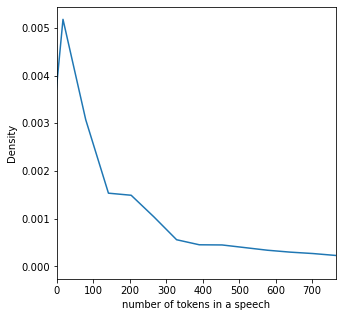

In [15]:
import matplotlib.pylab as plt
plt.figure(figsize=(5,5))

top5 = int(np.quantile(df['token_count'], 0.95))


plt.xlim(0,top5)
plt.xlabel('number of tokens in a speech')

chart = df['token_count']

chart.plot(kind='density')
print('5% of speeches contain more than ' + str(top5))

In [63]:
import datetime
df['y'] = [row['date_time'].year for idx,row in df.iterrows()]
df['m'] = [row['date_time'].month for idx,row in df.iterrows()]
df['ym'] = [row['y'] + row['m']/12 for idx,row in df.iterrows()]

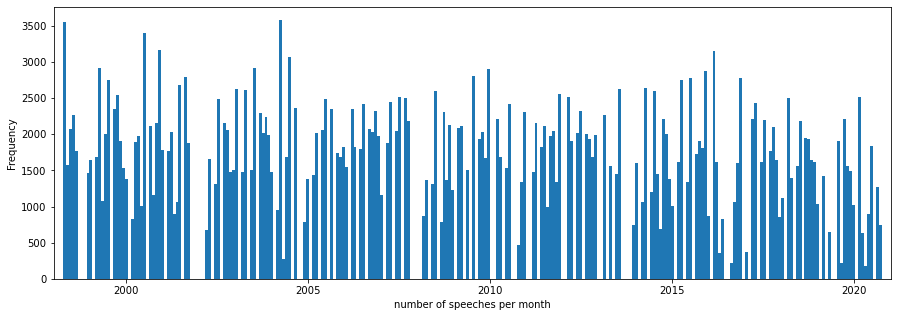

In [67]:

y = df['y']
ym = df['ym']

import matplotlib.pylab as plt
plt.figure(figsize=(15,5))
minm = 1998
maxm = 2021
plt.xlim(minm,maxm)

plt.xlabel('number of speeches per month')

ym.plot(kind='hist', bins=276)